Health Analytics Group Project

Data Cleaning, Feature Engineering & EDA

Dataset: https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset?select=heart_disease_health_indicators_BRFSS2015.csv
    
Data Dictionary: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.preprocessing import OneHotEncoder

**Loading the Data**

In [95]:
df=pd.read_csv("original_data.csv")
df=pd.DataFrame(df)
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

**Encoding Categorical Variables**

In [96]:
one_hot_diabetes=pd.get_dummies(df["Diabetes"])
df=df.drop('Diabetes', axis=1)
df=df.join(one_hot_diabetes)

In [97]:
df=df.rename({0.0: 'NoDiabetes', 1.0: 'PreDiabetes', 2.0: 'HasDiabetes'}, axis=1)


In [98]:
one_hot_gen_health=pd.get_dummies(df["GenHlth"])
df=df.drop('GenHlth', axis=1)
df=df.join(one_hot_gen_health)

In [99]:
df=df.rename({ 1.0: 'ExcellentGenHealth', 2.0: 'VeryGoodGenHealth', 3.0: 'GoodGenHealth', 4.0: 'FairGenHealth', 5.0: 'PoorGenHealth'}, axis=1)


In [100]:
one_hot_age=pd.get_dummies(df["Age"])
df=df.drop('Age', axis=1)
df=df.join(one_hot_age)

df=df.rename({ 1.0: 'Age18to24', 2.0: 'Age25to29', 3.0: 'Age30to34', 4.0: 'Age35to39', 
              5.0: 'Age40to44', 6.0: 'Age45to49', 7.0: 'Age50to54', 8.0: 'Age55to59',
             9.0: 'Age60to64', 10.0: 'Age65to69', 11.0: 'Age70to74', 12.0: 'Age75to79', 13.0: 'Age80Plus'}, axis=1)


In [101]:
one_hot_edu=pd.get_dummies(df["Education"])
df=df.drop('Education', axis=1)
df=df.join(one_hot_edu)

df=df.rename({ 1.0: 'EducationNoElementary', 2.0: 'EducationElementary', 3.0: 'EducationSomeHS',
              4.0: 'EducationHSGrad', 5.0: 'EducationSomeCollege', 6.0: 'EducationCollegeGrad'}, axis=1)


In [102]:
one_hot_income=pd.get_dummies(df["Income"])
df=df.drop('Income', axis=1)
df=df.join(one_hot_income)

df=df.rename({ 1.0: 'IncomeUnder10k', 2.0: 'Income10kto15k', 3.0: 'Income15kto20k',
              4.0: 'Income20kto25k', 5.0: 'Income25kto35k', 6.0: 'Income35kto50k',
             7.0: 'Income50kto75k', 8.0: 'IncomeOver75k'}, axis=1)


In [103]:
one_hot_gender=pd.get_dummies(df["Sex"])
df=df.drop('Sex', axis=1)
df=df.join(one_hot_gender)

df=df.rename({ 0.0: 'Male', 1.0: 'Female'}, axis=1)


**Saving Final Data as CSV**

In [104]:
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,NoDiabetes,PreDiabetes,HasDiabetes,ExcellentGenHealth,VeryGoodGenHealth,GoodGenHealth,FairGenHealth,PoorGenHealth,Age18to24,Age25to29,Age30to34,Age35to39,Age40to44,Age45to49,Age50to54,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80Plus,EducationNoElementary,EducationElementary,EducationSomeHS,EducationHSGrad,EducationSomeCollege,EducationCollegeGrad,IncomeUnder10k,Income10kto15k,Income15kto20k,Income20kto25k,Income25kto35k,Income35kto50k,Income50kto75k,IncomeOver75k,Male,Female
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,18.0,15.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,30.0,30.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 53 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HeartDiseaseorAttack   253680 non-null  float64
 1   HighBP                 253680 non-null  float64
 2   HighChol               253680 non-null  float64
 3   CholCheck              253680 non-null  float64
 4   BMI                    253680 non-null  float64
 5   Smoker                 253680 non-null  float64
 6   Stroke                 253680 non-null  float64
 7   PhysActivity           253680 non-null  float64
 8   Fruits                 253680 non-null  float64
 9   Veggies                253680 non-null  float64
 10  HvyAlcoholConsump      253680 non-null  float64
 11  AnyHealthcare          253680 non-null  float64
 12  NoDocbcCost            253680 non-null  float64
 13  MentHlth               253680 non-null  float64
 14  PhysHlth               253680 non-nu

In [106]:
df.to_csv("final_data.csv")

**EDA on Final Data Set**

In [6]:
df=pd.read_csv("final_data.csv")
df=pd.DataFrame(df)
df=df.drop("Unnamed: 0", axis=1)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,NoDiabetes,PreDiabetes,HasDiabetes,ExcellentGenHealth,VeryGoodGenHealth,GoodGenHealth,FairGenHealth,PoorGenHealth,Age18to24,Age25to29,Age30to34,Age35to39,Age40to44,Age45to49,Age50to54,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80Plus,EducationNoElementary,EducationElementary,EducationSomeHS,EducationHSGrad,EducationSomeCollege,EducationCollegeGrad,IncomeUnder10k,Income10kto15k,Income15kto20k,Income20kto25k,Income25kto35k,Income35kto50k,Income50kto75k,IncomeOver75k,Male,Female
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,18.0,15.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,30.0,30.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [10]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,NoDiabetes,PreDiabetes,HasDiabetes,ExcellentGenHealth,VeryGoodGenHealth,GoodGenHealth,FairGenHealth,PoorGenHealth,Age18to24,Age25to29,Age30to34,Age35to39,Age40to44,Age45to49,Age50to54,Age55to59,Age60to64,Age65to69,Age70to74,Age75to79,Age80Plus,EducationNoElementary,EducationElementary,EducationSomeHS,EducationHSGrad,EducationSomeCollege,EducationCollegeGrad,IncomeUnder10k,Income10kto15k,Income15kto20k,Income20kto25k,Income25kto35k,Income35kto50k,Income50kto75k,IncomeOver75k,Male,Female
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,3.184772,4.242081,0.168224,0.842412,0.018255,0.139333,0.178567,0.351167,0.298195,0.124448,0.047623,0.022469,0.029951,0.043847,0.054490,0.063690,0.078126,0.103729,0.121539,0.131047,0.126908,0.092766,0.062993,0.068444,0.000686,0.015937,0.037362,0.247359,0.275583,0.423072,0.038675,0.046448,0.063048,0.079372,0.102030,0.143764,0.170368,0.356295,0.559658,0.440342
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,7.412847,8.717951,0.374066,0.364355,0.133873,0.346294,0.382990,0.477336,0.457466,0.330093,0.212968,0.148204,0.170453,0.204754,0.226982,0.244201,0.268370,0.304909,0.326753,0.337452,0.332870,0.290105,0.242950,0.252508,0.026181,0.125234,0.189648,0.431478,0.446809,0.494048,0.192819,0.210454,0.243050,0.270318,0.302689,0.350851,0.375957,0.478905,0.496429,0.496429
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1

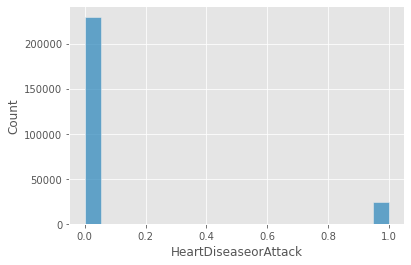

In [28]:
sns.histplot(df.HeartDiseaseorAttack)

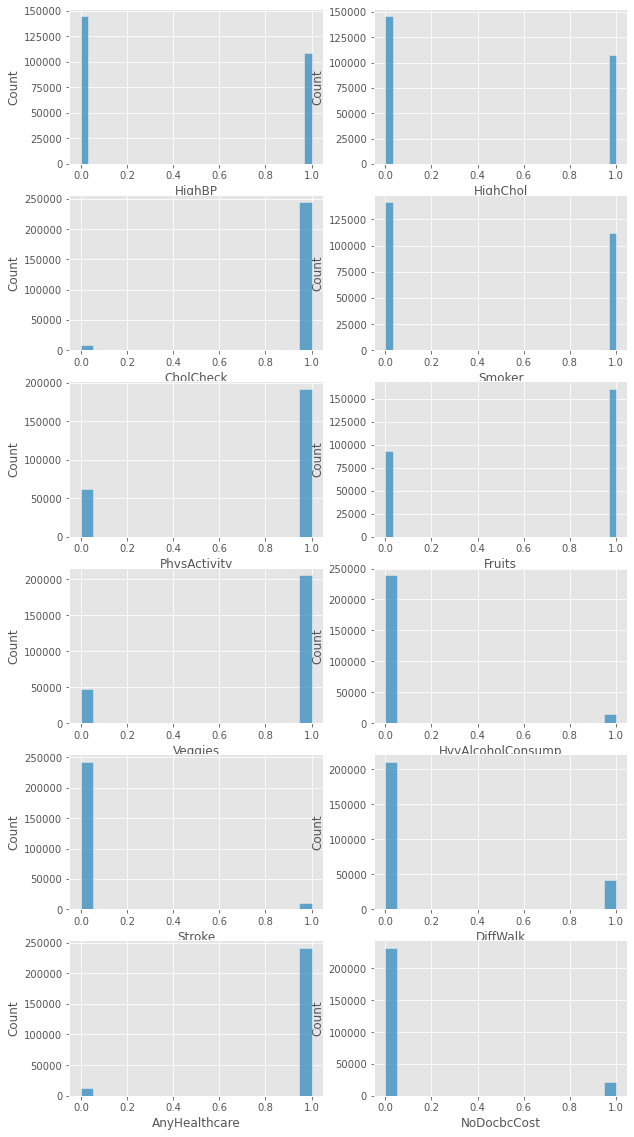

In [31]:
fig, ax = plt.subplots(6, 2, figsize=(10,20))
sns.histplot(df.HighBP, ax=ax[0, 0])
sns.histplot(df.HighChol, ax=ax[0, 1])
sns.histplot(df.CholCheck, ax=ax[1, 0])
sns.histplot(df.Smoker, ax=ax[1, 1])
sns.histplot(df.PhysActivity, ax=ax[2, 0])
sns.histplot(df.Fruits, ax=ax[2, 1])
sns.histplot(df.Veggies, ax=ax[3, 0])
sns.histplot(df.HvyAlcoholConsump, ax=ax[3, 1])
sns.histplot(df.Stroke, ax=ax[4, 0])
sns.histplot(df.DiffWalk, ax=ax[4, 1])
sns.histplot(df.AnyHealthcare, ax=ax[5, 0])
sns.histplot(df.NoDocbcCost, ax=ax[5, 1])

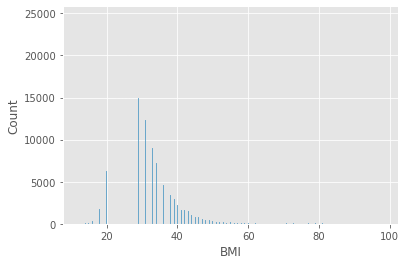

In [32]:
sns.histplot(df.BMI)

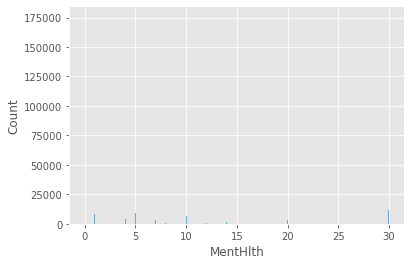

In [42]:
sns.histplot(df.MentHlth)

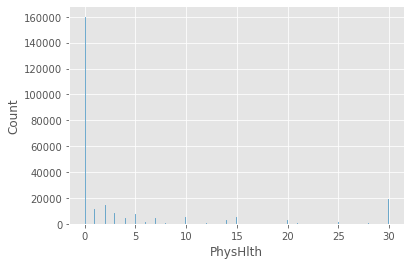

In [43]:
sns.histplot(df.PhysHlth)

In [51]:
df2=pd.read_csv("original_data.csv")
df2=pd.DataFrame(df2)

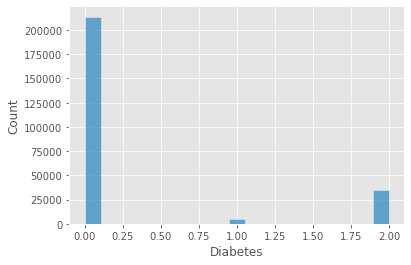

In [45]:
sns.histplot(df2.Diabetes)

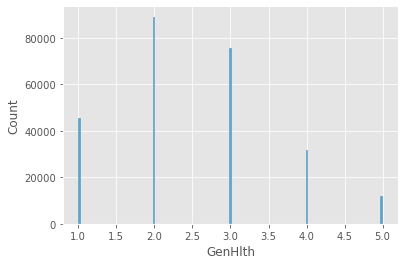

In [46]:
sns.histplot(df2.GenHlth)

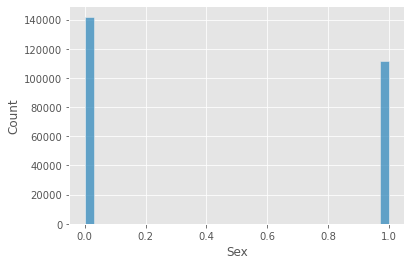

In [47]:
sns.histplot(df2.Sex)

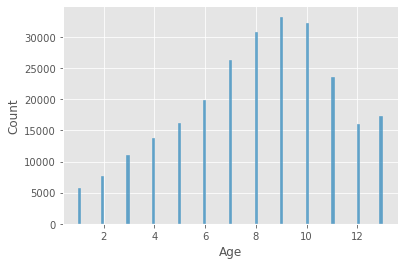

In [48]:
sns.histplot(df2.Age)

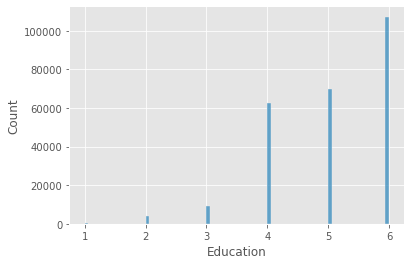

In [49]:
sns.histplot(df2.Education)

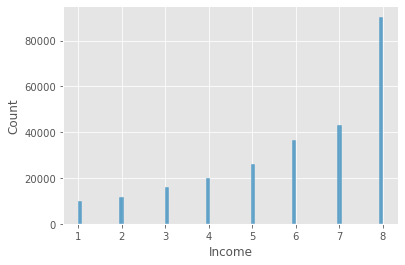

In [50]:
sns.histplot(df2.Income)

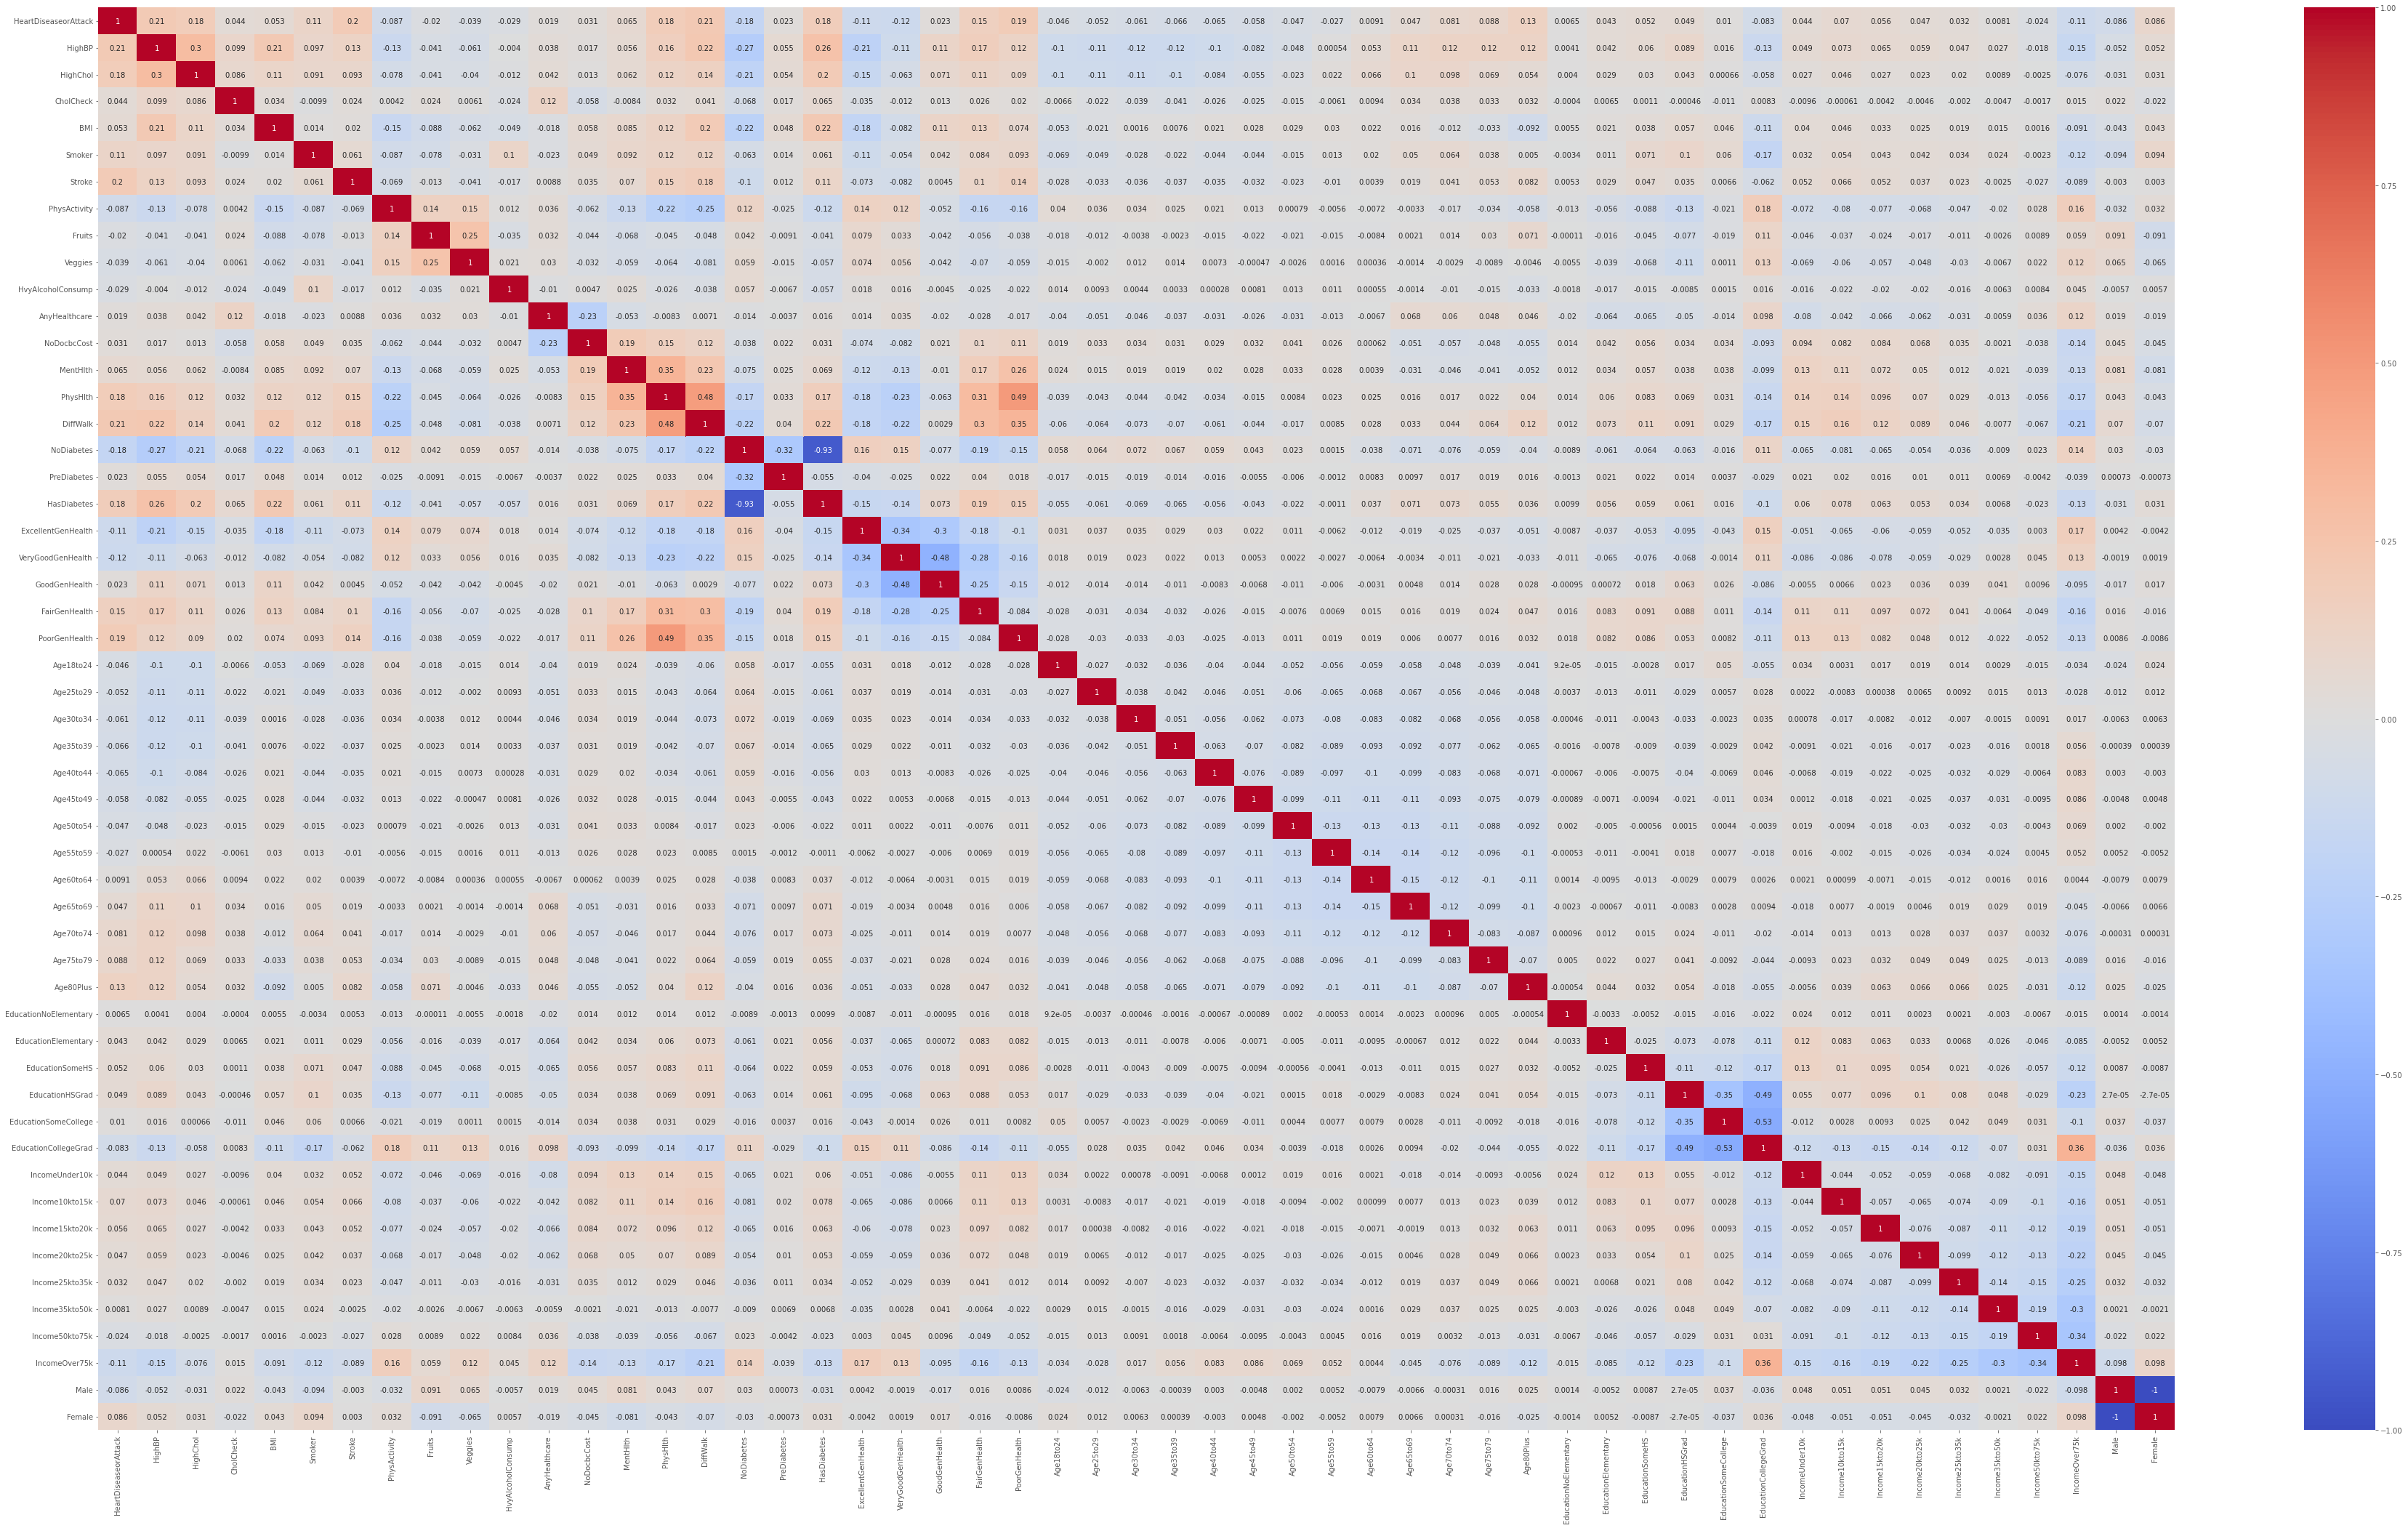

In [56]:
fig, ax = plt.subplots(figsize = (64,36))
sns.heatmap(df.corr(), cmap = 'coolwarm', center = 0, annot = True, )